In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

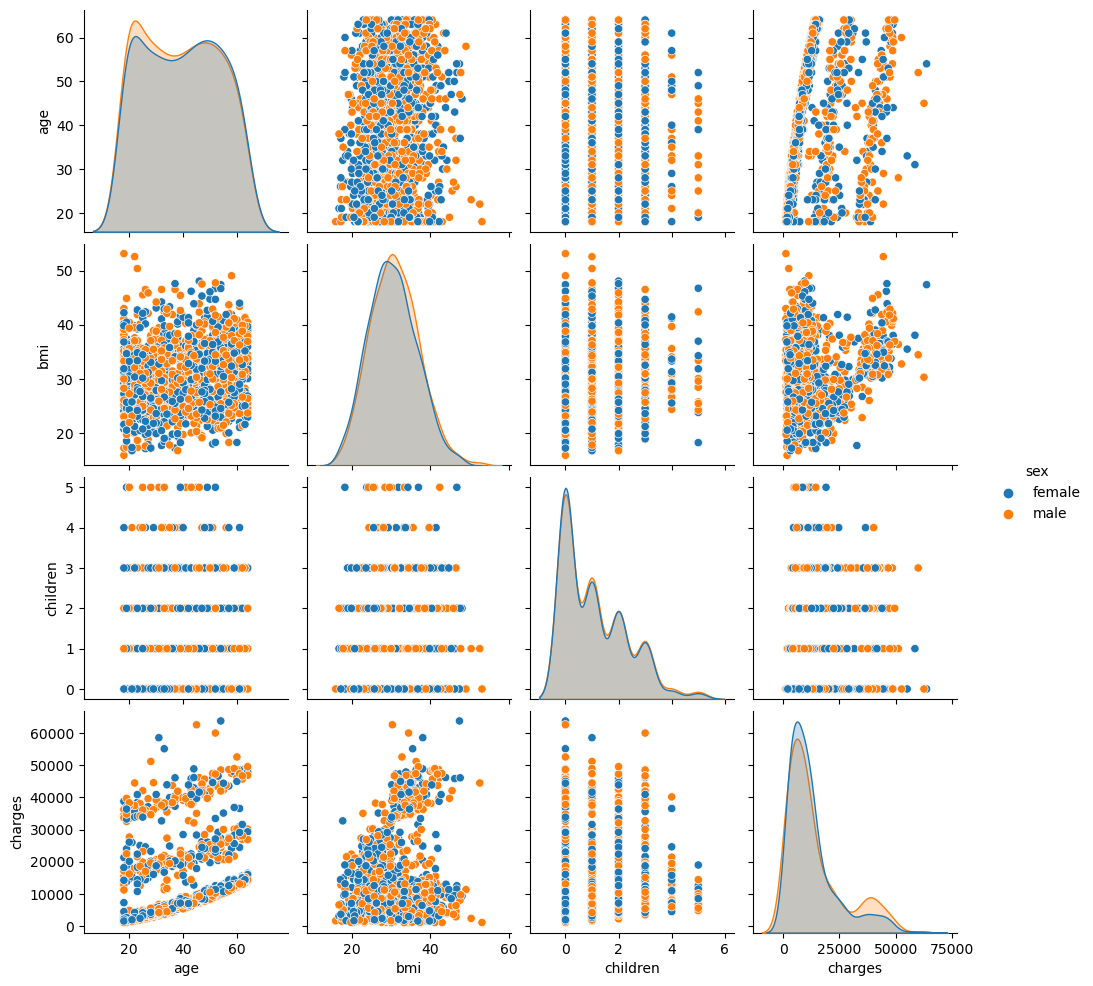

In [7]:
sns.pairplot(df, hue = 'sex')

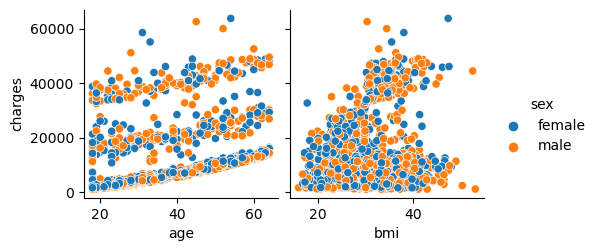

In [8]:
sns.pairplot(df, x_vars = ['age', 'bmi'], y_vars = ['charges'], hue = 'sex')

In [9]:
df.corr(numeric_only=True).style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: xlabel='smoker', ylabel='charges'>

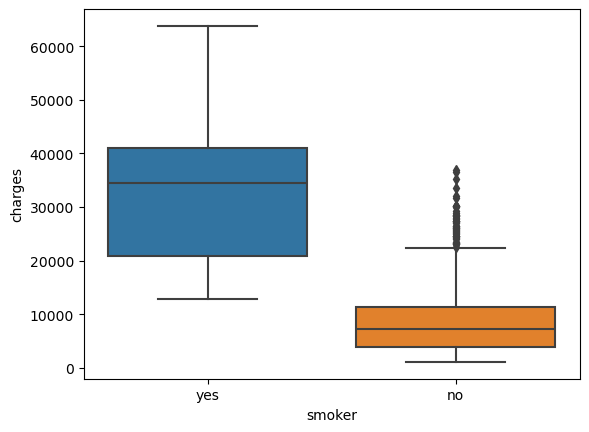

In [10]:
sns.boxplot(y='charges',x='smoker',data=df)

In [11]:
df = pd.get_dummies(df, columns = ['sex', 'smoker', 'region'])

X = df.drop('charges',axis=1)
Y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


In [13]:
from sklearn.linear_model import LinearRegression

#create instance of linear regression class and assign it to model
model = LinearRegression()

#use fit method to take training features and target variable and learn their weights
model.fit(X_train, y_train)

print(model.intercept_)


-1006.3437738448702


In [14]:
# create a df that displays the coefficients of independent variables
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=
                               ['Coefficient'])
coeff_parameter

,Coefficient
age,244.506584
bmi,364.951179
children,413.001067
sex_female,-54.371923
sex_male,54.371923
smoker_no,-11827.918983
smoker_yes,11827.918983
region_northeast,424.392856
region_northwest,525.225009
region_southeast,-489.503468


In [15]:
#use weights and intercept to compute prediction (y) for each record in X_test
predictions = model.predict(X_test)
predictions

array([10870.1944927 ,  2931.00956297, 10552.51567371, 27006.85847048,
        6216.46537304,   435.84815599, 15346.22045379,  3968.90411373,
       11162.77917975,  6826.31516327,  8228.43994448, 10752.07010885,
        6493.16868789, 12750.67606087, 30972.77228568, 36900.78120104,
       10488.62527205,  2871.23239228, 15159.89602534, 13820.53590276,
       30077.91555121,  7351.38487978, 12740.73649161,  5913.04211057,
         470.51851803, 25134.8518974 , 12193.48072537, 27390.20736285,
       37879.6989273 ,  4478.70241246,  6057.81828673,  7238.28213158,
        3554.81585714,  2545.81224213,  5715.91485337,  5965.34699386,
         335.76084422, 12339.02151423, 13784.37910081, 11013.52985855,
       10292.80573926,  9627.9173202 , 14866.10427165, 10325.69750784,
        6312.6243494 ,  6168.4221984 ,  8244.90205016,  2131.35276428,
       12719.76653888,  2212.00221052, -1450.95921631,  2464.19984494,
        7271.86578049,  8672.32977973,  4309.78778387, 14275.06733065,
      

<Axes: xlabel='charges'>

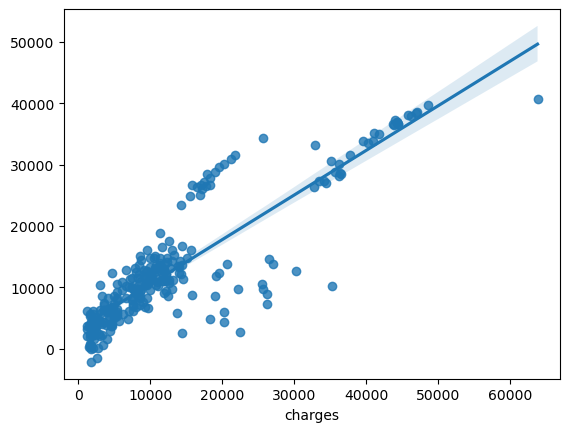

In [16]:
sns.regplot(x=y_test,y=predictions)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

#measure squared difference between predictions(y^) and actual value(y)
mse = mean_squared_error(y_test, predictions)
#measure standard deviations of prediction errors
rmse = np.sqrt(mse)
#model performance
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MSE: 33748393.37059589
RMSE: 5809.336741022669
R^2: 0.760837110132396


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Create a pipeline that first scales the features and then applies a model
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100))

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Calculate RMSE
#measure squared difference between predictions(y^) and actual value(y)
mse = mean_squared_error(y_test, predictions)
#measure standard deviations of prediction errors
rmse = np.sqrt(mse)
#model performance
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MSE: 21524864.360763773
RMSE: 4639.489665983078
R^2: 0.8474609233097972
